In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# **LECTURA DE BASES**

In [ ]:
agro = pd.read_excel("/content/drive/MyDrive/Juan/BaseAgro.xlsx")
agro.head()

,N° Area,Departamento,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,TOTAL-Ar,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,TOTAL-Viv,CasaT-A,CasaT-B,TOTAL-CasaT,VIVIENDAS,PobUrbana,PobRural,TOTAL-PobRural,Pob_<29,Pob_>65,TOTAL-Pob,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,TOTAL-Educ,Cat-Obrero,Cat-Patron,Cat-Cuentaprop,Cat-Familiar,...,Sin Luz,TOTAL-Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,TOTAL-H.1,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,TOTAL-Proc,CalSS1,CalSS2,CalSS3,TOTAL-Cal,BanoSI,BanoNO,TOTAL-Bano,ExclusivoSI,ExclusivoNO,TOTAL-Exclusivo,CadenaSI,CadenaNO,TOTAL-Cadena,Desag1,Desag2,Desag3,Desag4,TOTAL-Desag,Piso1,Piso2,Piso3,Piso4,TOTAL-Piso,HOGARES
0,7,Apóstoles,9220,413,1437,11070,9318,178,1236,214,93,8,9,1,2,11059,6856,2462,9318,11057,35213,7036,42249,25172,2902,42249,1607,7044,13569,3754,7026,1614,914,658,916,37102,6607,156,5760,2466,...,578,11556,2585,1947,3401,1244,1853,526,11556,9232,870,64,1203,5,182,11556,536,5446,5574,11556,10952,604,11556,10522,430,10952,8351,2601,10952,561,5971,2846,1574,10952,6192,4361,828,175,11556,11556
1,14,Cainguás,7914,421,5689,14024,13233,355,150,77,147,1,32,3,2,14000,6508,6725,13233,13998,54403,24434,78837,32999,3421,53403,1854,9463,21980,2438,7155,1224,538,478,557,45687,9194,275,5260,4677,...,1029,14387,2660,2388,4565,1745,2401,628,14387,7936,1332,156,3537,29,1397,14387,93,3869,10425,14387,13352,1035,14387,12784,568,13352,7533,5819,13352,101,4748,3968,4535,13352,10000,3871,290,226,14387,14387
2,21,Candelaria,4802,987,1130,6919,6435,155,264,3,29,0,12,5,1,6904,4127,2308,6435,6903,27040,8278,35318,16091,1721,27040,949,4360,9322,2363,4594,534,324,292,465,23203,5416,133,2153,1088,...,388,7299,1341,1013,2234,870,1406,435,7299,5479,459,27,1176,12,146,7299,200,3303,3796,7299,6807,492,7299,6556,251,6807,4890,1917,6807,210,3775,1548,1274,6807,3293,3255,566,185,7299,7299
3,28,Capital,86931,319,1088,88338,71286,1440,2699,11442,1042,29,250,5,29,88222,59311,11610,70921,88193,324756,5287,330043,52429,4899,87853,11916,39445,75740,44007,65032,10635,9111,14397,20638,290921,92653,7699,29884,6225,...,499,92882,18968,16146,28444,10543,14876,3905,92882,85842,3982,279,2472,175,132,92882,40391,29811,22680,92882,89962,2920,92882,86420,3542,89962,80385,9577,89962,40654,32780,13564,2964,89962,65860,24242,1668,1112,92882,92939
4,35,Concepción,1684,134,742,2560,2206,218,107,0,6,0,3,12,0,2552,1395,811,2206,2552,9577,3245,12822,5769,713,9577,290,1889,3626,496,1278,301,118,66,104,8168,2016,58,617,300,...,348,2584,584,417,746,295,415,127,2584,1759,358,8,309,4,146,2584,0,898,1686,2584,2386,198,2584,2290,96,2386,1609,777,2386,0,1060,769,557,2386,1075,1094,370,45,2584,2584


In [ ]:
regiones = pd.read_excel("/content/drive/MyDrive/Juan/MUNIS_Regiones.xlsx", sheet_name='Copia1')
regiones.head(50)

,Microrregion,Departamento
0,Alto Uruguay,25 de Mayo
1,Alto Parana,Eldorado
2,Centro,Leandro N. Alem
3,Sur,San Javier
4,Sur,Apóstoles
5,Centro,Cainguás
6,Nordeste,General Manuel Belgrano
7,Sur,Candelaria
8,Centro,Oberá
9,Oeste,Libertador General San Martín


In [ ]:
prop = pd.read_excel('/content/drive/MyDrive/Juan/BaseAgroProp.xlsx')
prop.head()

,N° Area,Departamento,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,TOTAL-Ar,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,TOTAL-Viv,CasaT-A,CasaT-B,TOTAL-CasaT,VIVIENDAS,PobUrbana,PobRural,TOTAL-PobRural,Pob_<29,Pob_>65,TOTAL-Pob,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,TOTAL-Educ,Cat-Obrero,Cat-Patron,Cat-Cuentaprop,Cat-Familiar,...,Sin Luz,TOTAL-Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,TOTAL-H.1,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,TOTAL-Proc,CalSS1,CalSS2,CalSS3,TOTAL-Cal,BanoSI,BanoNO,TOTAL-Bano,ExclusivoSI,ExclusivoNO,TOTAL-Exclusivo,CadenaSI,CadenaNO,TOTAL-Cadena,Desag1,Desag2,Desag3,Desag4,TOTAL-Desag,Piso1,Piso2,Piso3,Piso4,TOTAL-Piso,HOGARES
0,7,Apóstoles,0.832882,0.037308,0.129810,11070,0.842572,0.016095,0.111764,0.019351,0.008409,0.000723,0.000814,0.000090,0.000181,11059,0.735780,0.264220,9318,11057,0.833464,0.166536,42249,0.595801,0.068688,42249,0.043313,0.189855,0.365722,0.101181,0.189370,0.043502,0.024635,0.017735,0.024689,37102,0.440790,0.010408,0.384282,0.164521,...,0.050017,11556,0.223693,0.168484,0.294306,0.107650,0.160350,0.045517,11556,0.798892,0.075286,0.005538,0.104102,0.000433,0.015749,11556,0.046383,0.471270,0.482347,11556,0.947733,0.052267,11556,0.960738,0.039262,10952,0.762509,0.237491,10952,0.051224,0.545197,0.259861,0.143718,10952,0.535826,0.377380,0.071651,0.015144,11556,11556
1,14,Cainguás,0.564318,0.030020,0.405662,14024,0.945214,0.025357,0.010714,0.005500,0.010500,0.000071,0.002286,0.000214,0.000143,14000,0.491801,0.508199,13233,13998,0.690069,0.309931,78837,0.617924,0.064060,53403,0.040580,0.207127,0.481100,0.053363,0.156609,0.026791,0.011776,0.010462,0.012192,45687,0.473771,0.014171,0.271050,0.241008,...,0.071523,14387,0.184889,0.165983,0.317300,0.121290,0.166887,0.043651,14387,0.551609,0.092584,0.010843,0.245847,0.002016,0.097102,14387,0.006464,0.268923,0.724612,14387,0.928060,0.071940,14387,0.957460,0.042540,13352,0.564185,0.435815,13352,0.007564,0.355602,0.297184,0.339649,13352,0.695072,0.269062,0.020157,0.015709,14387,14387
2,21,Candelaria,0.694031,0.142651,0.163318,6919,0.932068,0.022451,0.038239,0.000435,0.004200,0.000000,0.001738,0.000724,0.000145,6904,0.641336,0.358664,6435,6903,0.765615,0.234385,35318,0.595081,0.063646,27040,0.040900,0.187907,0.401758,0.101840,0.197992,0.023014,0.013964,0.012585,0.020041,23203,0.616155,0.015131,0.244937,0.123777,...,0.053158,7299,0.183724,0.138786,0.306069,0.119194,0.192629,0.059597,7299,0.750651,0.062885,0.003699,0.161118,0.001644,0.020003,7299,0.027401,0.452528,0.520071,7299,0.932594,0.067406,7299,0.963126,0.036874,6807,0.718378,0.281622,6807,0.030851,0.554576,0.227413,0.187160,6807,0.451158,0.445952,0.077545,0.025346,7299,7299
3,28,Capital,0.984073,0.003611,0.012316,88338,0.808030,0.016322,0.030593,0.129696,0.011811,0.000329,0.002834,0.000057,0.000329,88222,0.836297,0.163703,70921,88193,0.983981,0.016019,330043,0.596781,0.055764,87853,0.040960,0.135587,0.260346,0.151268,0.223538,0.036556,0.031318,0.049488,0.070940,290921,0.678971,0.056419,0.218993,0.045617,...,0.005372,92882,0.204216,0.173833,0.306238,0.113510,0.160160,0.042043,92882,0.924205,0.042872,0.003004,0.026614,0.001884,0.001421,92882,0.434864,0.320956,0.244181,92882,0.968562,0.031438,92882,0.960628,0.039372,89962,0.893544,0.106456,89962,0.451902,0.364376,0.150775,0.032947,89962,0.709072,0.260998,0.017958,0.011972,92882,92939
4,35,Concepción,0.657813,0.052344,0.289844,2560,0.864420,0.085423,0.041928,0.000000,0.002351,0.000000,0.001176,0.004702,0.000000,2552,0.632366,0.367634,2206,2552,0.746919,0.253081,12822,0.602381,0.074449,9577,0.035504,0.231268,0.443928,0.060725,0.156464,0.036851,0.014447,0.008080,0.012733,8168,0.674022,0.019392,0.206286,0.100301,...,0.134675,2584,0.226006,0.161378,0.288700,0.114164,0.160604,0.049149,2584,0.680728,0.138545,0.003096,0.119582,0.001548,0.056502,2584,0.000000,0.347523,0.652477,2584,0.923375,0.076625,2584,0.959765,0.040235,2386,0.674350,0.325650,2386,0.000000,0.444258,0.322297,0.233445,2386,0.4160

In [ ]:
microrregiones = ['Alto Parana','Alto Uruguay','Centro','Nordeste','Sur']

# **DATOS**

### **Desagüe**

In [ ]:
df_desag = agro[['Departamento','Desag1','Desag2','Desag3','Desag4','TOTAL-Desag']]

In [ ]:
desague = df_desag.merge(regiones, how='left', on='Departamento')
cols = desague.columns.tolist()
cols = cols[-1:] + cols[:-1]
desague = desague[cols]
columnas = ['Microrregion','Departamento','Cloaca','Camara/Pozo','Pozo Ciego','Excavacion','Total']
desague.columns = columnas
desague = desague.groupby('Microrregion', as_index=False).sum()
desague = desague.set_index('Microrregion')
desague['Cloaca %'] = (desague['Cloaca'] / desague['Total'] * 100).round(2)
desague['Camara/Pozo %'] = (desague['Camara/Pozo'] / desague['Total'] * 100).round(2)
desague['Pozo Ciego %'] = (desague['Pozo Ciego'] / desague['Total'] * 100).round(2)
desague['Excavacion %'] = (desague['Excavacion'] / desague['Total'] * 100).round(2)

### **Tecnologia**

In [ ]:
df_pc = agro[['Departamento','PC-SI','PC-NO','TOTAL-PC']]
df_cel = agro[['Departamento','Cel-SI','Cel-NO','TOTAL-Cel']]

In [ ]:
pc = df_pc.merge(regiones, how='left', on='Departamento')
cols = pc.columns.tolist()
cols = cols[-1:] + cols[:-1]
pc = pc[cols]
columnas = ['Microrregion','Departamento','Posee PC','No Posee PC','Total']
pc.columns = columnas
pc = pc.groupby('Microrregion', as_index=False).sum()
pc = pc.set_index('Microrregion')
pc['Posee PC %'] = (pc['Posee PC'] / pc['Total'] * 100).round(2)
pc['No Posee PC %'] = (pc['No Posee PC'] / pc['Total'] * 100).round(2)

In [ ]:
cel = df_cel.merge(regiones, how='left', on='Departamento')
cols = cel.columns.tolist()
cols = cols[-1:] + cols[:-1]
cel = cel[cols]
columnas = ['Microrregion','Departamento','Posee Cel','No Posee Cel','Total']
cel.columns = columnas
cel = cel.groupby('Microrregion', as_index=False).sum()
cel = cel.set_index('Microrregion')
cel['Posee Cel %'] = (cel['Posee Cel'] / cel['Total'] * 100).round(2)
cel['No Posee Cel %'] = (cel['No Posee Cel'] / cel['Total'] * 100).round(2)

### **Educacion**

In [ ]:
df_educ = agro[['Departamento','Educ1','Educ2','Educ3','Educ4','Educ5','Educ6','Educ7','Educ8','Educ9', 'TOTAL-Educ']]
df_prop = prop[['Departamento','Educ1','Educ2','Educ3','Educ4','Educ5','Educ6','Educ7','Educ8','Educ9', 'TOTAL-Educ']].round(2)

In [ ]:
educacion = df_educ.merge(regiones, how='left', on='Departamento')
cols = educacion.columns.tolist()
cols = cols[-1:] + cols[:-1]
educacion = educacion[cols]
columnas = ['Microrregion','Departamento','Inicial','Primario Completo','Primario Incompleto','Secundario Completo','Secundario Incompleto','Sup No Universitario Completo','Sup No Universitario Incompleto','Universitario Completo','Universitario Incompleto','Total Niveles']
educacion.columns = columnas
educacion = educacion.groupby('Microrregion', as_index=False).sum()
educacion = educacion.set_index('Microrregion')
educacion['Inicial %'] = (educacion['Inicial'] / educacion['Total Niveles'] * 100).round(2)
educacion['Primario Completo %'] = (educacion['Primario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Primario Incompleto %'] = (educacion['Primario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Secundario Completo %'] = (educacion['Secundario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Secundario Incompleto %'] = (educacion['Secundario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Sup No Universitario Completo %'] = (educacion['Sup No Universitario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Sup No Universitario Incompleto %'] = (educacion['Sup No Universitario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion['Universitario Completo %'] = (educacion['Universitario Completo'] / educacion['Total Niveles'] * 100).round(2)
educacion['Universitario Incompleto %'] = (educacion['Universitario Incompleto'] / educacion['Total Niveles'] * 100).round(2)
educacion.head()

,Inicial,Primario Completo,Primario Incompleto,Secundario Completo,Secundario Incompleto,Sup No Universitario Completo,Sup No Universitario Incompleto,Universitario Completo,Universitario Incompleto,Total Niveles,Inicial %,Primario Completo %,Primario Incompleto %,Secundario Completo %,Secundario Incompleto %,Sup No Universitario Completo %,Sup No Universitario Incompleto %,Universitario Completo %,Universitario Incompleto %
Microrregion,,,,,,,,,,,,,,,,,,,
Alto Parana,2796,11476,25963,7871,14466,1879,1411,1314,1180,68356,4.09,16.79,37.98,11.51,21.16,2.75,2.06,1.92,1.73
Alto Uruguay,2723,16126,43652,3342,10304,1497,603,670,603,79520,3.42,20.28,54.89,4.20,12.96,1.88,0.76,0.84,0.76
Centro,7053,36731,73529,14234,30268,6191,3234,3745,4374,179359,3.93,20.48,41.00,7.94,16.88,3.45,1.80,2.09,2.44
Nordeste,2590,10443,33589,2982,8426,1201,600,454,510,60795,4.26,17.18,55.25,4.91,13.86,1.98,0.99,0.75,0.84
Oeste,4383,23511,49342,10574,23880,3846,2206,1988,1985,121715,3.60,19.32,40.54,8.69,19.62,3.16,1.81,1.63,1.63


# **TABLAS INDIVIDUALES**

### **Desagüe**

In [ ]:
cloaca = pd.DataFrame(desague[['Cloaca','Total','Cloaca %']])
cloaca = cloaca.rename(columns={'Cloaca PC %':'En %'})
cloaca

,Cloaca,Total,Cloaca %
Microrregion,,,
Alto Parana,2258,19743,11.44
Alto Uruguay,167,22860,0.73
Centro,7378,53914,13.68
Nordeste,286,16909,1.69
Oeste,3407,35553,9.58
Sur,41625,115393,36.07


In [ ]:
cam_pozo = pd.DataFrame(desague[['Camara/Pozo','Total','Camara/Pozo %']])
cam_pozo = cam_pozo.rename(columns={'Camara/Pozo PC %':'En %'})
cam_pozo

,Camara/Pozo,Total,Camara/Pozo %
Microrregion,,,
Alto Parana,9080,19743,45.99
Alto Uruguay,5927,22860,25.93
Centro,19884,53914,36.88
Nordeste,4873,16909,28.82
Oeste,17390,35553,48.91
Sur,45920,115393,39.79


In [ ]:
pciego = pd.DataFrame(desague[['Pozo Ciego','Total','Pozo Ciego %']])
pciego = pciego.rename(columns={'Pozo Ciego PC %':'En %'})
pciego

,Pozo Ciego,Total,Pozo Ciego %
Microrregion,,,
Alto Parana,5424,19743,27.47
Alto Uruguay,6737,22860,29.47
Centro,13242,53914,24.56
Nordeste,4957,16909,29.32
Oeste,7392,35553,20.79
Sur,19961,115393,17.30


In [ ]:
excavacion = pd.DataFrame(desague[['Excavacion','Total','Excavacion %']])
excavacion = excavacion.rename(columns={'Excavacion PC %':'En %'})
excavacion

,Excavacion,Total,Excavacion %
Microrregion,,,
Alto Parana,2981,19743,15.10
Alto Uruguay,10029,22860,43.87
Centro,13410,53914,24.87
Nordeste,6793,16909,40.17
Oeste,7364,35553,20.71
Sur,7887,115393,6.83


In [ ]:
tdesague = pd.DataFrame(desague[['Cloaca','Cloaca %','Camara/Pozo','Camara/Pozo %','Pozo Ciego','Pozo Ciego %','Excavacion','Excavacion %','Total']])
tdesague = tdesague.rename(columns={'Cloaca PC %':'En %','Camara/Pozo %':'En %','Pozo Ciego':'En %','Excavacion %':'En %'})
tdesague

,Cloaca,Cloaca %,Camara/Pozo,En %,En %,Pozo Ciego %,Excavacion,En %,Total
Microrregion,,,,,,,,,
Alto Parana,2258,11.44,9080,45.99,5424,27.47,2981,15.10,19743
Alto Uruguay,167,0.73,5927,25.93,6737,29.47,10029,43.87,22860
Centro,7378,13.68,19884,36.88,13242,24.56,13410,24.87,53914
Nordeste,286,1.69,4873,28.82,4957,29.32,6793,40.17,16909
Oeste,3407,9.58,17390,48.91,7392,20.79,7364,20.71,35553
Sur,41625,36.07,45920,39.79,19961,17.30,7887,6.83,115393


En tabla se visualizan los distintos desagües de inodoro separados por microrregion. Se observa que la Microrregion Sur es la que presenta la mayor cantidad de hogares con desagüe a cloacas de las microrregiones y aproximadamente un 39,79% de hogares cuyos desagües son hacia cámaras sépticas o pozos ciegos, mientras que la Microrregión Alto Uruguay presenta menos del 1% de los hogares con acceso a cloacas y la mayor parte de los mismos cuenta con desagüe hacia excavaciones en la tierra.

Si comparamos el caso de las Microrregiones Alto Parana, Centro y Oeste, el promedio de hogares que cuentan con desagüe a cloacas se encuentra alrededor del 11,5% aproximadamente. Sin embargo, la diferencia entre las mencionadas Microrregiones aumenta al comparar las distintas alternativas de desagüe, donde el Centro presenta mayor precariedad al contar con la mayor proporción de hogares con desagüe a excavaciones con respecto al Alto Parana y Oeste.

### **Tecnologia**

In [ ]:
pcsi = pd.DataFrame(pc[['Posee PC','Total','Posee PC %']])
pcsi = pcsi.rename(columns={'Posee PC %':'En %'})
pcsi

,Posee PC,Total,En %
Microrregion,,,
Alto Parana,6658,21466,31.02
Alto Uruguay,3411,25318,13.47
Centro,13873,57474,24.14
Nordeste,2551,18707,13.64
Oeste,8806,38088,23.12
Sur,45017,120035,37.50


In [ ]:
pcno = pd.DataFrame(pc[['No Posee PC','Total','No Posee PC %']])
pcno = pcno.rename(columns={'No Posee PC %':'En %'})
pcno

,No Posee PC,Total,En %
Microrregion,,,
Alto Parana,14808,21466,68.98
Alto Uruguay,21907,25318,86.53
Centro,43601,57474,75.86
Nordeste,16156,18707,86.36
Oeste,29282,38088,76.88
Sur,75018,120035,62.50


In [ ]:
pctotal = pd.DataFrame(pc[['Posee PC','Posee PC %','No Posee PC','No Posee PC %','Total']])
pctotal = pctotal.rename(columns={'Posee PC %':'En %','No Posee PC %':'En %'})
pctotal

,Posee PC,En %,No Posee PC,En %,Total
Microrregion,,,,,
Alto Parana,6658,31.02,14808,68.98,21466
Alto Uruguay,3411,13.47,21907,86.53,25318
Centro,13873,24.14,43601,75.86,57474
Nordeste,2551,13.64,16156,86.36,18707
Oeste,8806,23.12,29282,76.88,38088
Sur,45017,37.50,75018,62.50,120035


Se observa que en todas las Microrregiones, la cantidad de hogares que no cuentan con acceso a una PC superan el 60% en todos los casos. En el caso del Alto Uruguay y el Nordeste los casos ascienden a más del 85%.
Se visualiza que la Microrregión Sur es la que cuenta con mayor proporción de acceso a una PC por hogar con respecto a las otras Microrregiones.

In [ ]:
celsi = pd.DataFrame(cel[['Posee Cel','Total','Posee Cel %']])
celsi = celsi.rename(columns={'Posee Cel %':'En %'})
celsi

,Posee Cel,Total,En %
Microrregion,,,
Alto Parana,18226,21466,84.91
Alto Uruguay,18652,25318,73.67
Centro,46727,57474,81.30
Nordeste,13608,18707,72.74
Oeste,31028,38088,81.46
Sur,104431,120035,87.00


In [ ]:
celno = pd.DataFrame(cel[['No Posee Cel','Total','No Posee Cel %']])
celno = celno.rename(columns={'No Posee Cel %':'En %'})
celno

,No Posee Cel,Total,En %
Microrregion,,,
Alto Parana,3240,21466,15.09
Alto Uruguay,6666,25318,26.33
Centro,10747,57474,18.70
Nordeste,5099,18707,27.26
Oeste,7060,38088,18.54
Sur,15604,120035,13.00


In [ ]:
celtotal = pd.DataFrame(cel[['Posee Cel','Posee Cel %','No Posee Cel','No Posee Cel %','Total']])
celtotal = celtotal.rename(columns={'Posee Cel %':'En %','No Posee Cel %':'En %'})
celtotal

,Posee Cel,En %,No Posee Cel,En %,Total
Microrregion,,,,,
Alto Parana,18226,84.91,3240,15.09,21466
Alto Uruguay,18652,73.67,6666,26.33,25318
Centro,46727,81.30,10747,18.70,57474
Nordeste,13608,72.74,5099,27.26,18707
Oeste,31028,81.46,7060,18.54,38088
Sur,104431,87.00,15604,13.00,120035


Al contrario de lo ocurrido en el análisis de hogares con acceso a una PC, se puede ver que en todas las Microrregiones es mayor la cantidad de hogares que cuentan con acceso a un Celular, los cuales representan más del 70% en todos los casos, que los que no lo tienen. Sin embargo, cabe señalar que las dos Microrregiones en la que existen menos celulares por hogar son Nordeste y Alto Uruguay, lo cual coincide con la cantidad de Hogares con acceso a una PC, donde también se tratan de las dos Microrregiones con menor acceso a las mismas.

### **Educacion**

In [ ]:
inicial = pd.DataFrame(educacion[['Inicial','Total Niveles','Inicial %']])
inicial = inicial.rename(columns={'Inicial %':'En %'})
inicial

,Inicial,Total Niveles,En %
Microrregion,,,
Alto Parana,2796,68356,4.09
Alto Uruguay,2723,79520,3.42
Centro,7053,179359,3.93
Nordeste,2590,60795,4.26
Oeste,4383,121715,3.60
Sur,15447,377270,4.09


In [ ]:
pcompleto = pd.DataFrame(educacion[['Primario Completo','Total Niveles','Primario Completo %']])
pcompleto = pcompleto.rename(columns={'Primario Completo %':'En %'})
pcompleto

,Primario Completo,Total Niveles,En %
Microrregion,,,
Alto Parana,11476,68356,16.79
Alto Uruguay,16126,79520,20.28
Centro,36731,179359,20.48
Nordeste,10443,60795,17.18
Oeste,23511,121715,19.32
Sur,56551,377270,14.99


In [ ]:
pincompleto = pd.DataFrame(educacion[['Primario Incompleto','Total Niveles','Primario Incompleto %']])
pincompleto = pincompleto.rename(columns={'Primario Incompleto %':'En %'})
pincompleto

,Primario Incompleto,Total Niveles,En %
Microrregion,,,
Alto Parana,25963,68356,37.98
Alto Uruguay,43652,79520,54.89
Centro,73529,179359,41.00
Nordeste,33589,60795,55.25
Oeste,49342,121715,40.54
Sur,110299,377270,29.24


In [ ]:
ptotal = pd.DataFrame(educacion[['Primario Completo','Primario Completo %','Primario Incompleto','Primario Incompleto %','Total Niveles']])
ptotal = ptotal.rename(columns={'Primario Completo %':'En %', 'Primario Incompleto %':'En %'}) 
ptotal

,Primario Completo,En %,Primario Incompleto,En %,Total Niveles
Microrregion,,,,,
Alto Parana,11476,16.79,25963,37.98,68356
Alto Uruguay,16126,20.28,43652,54.89,79520
Centro,36731,20.48,73529,41.00,179359
Nordeste,10443,17.18,33589,55.25,60795
Oeste,23511,19.32,49342,40.54,121715
Sur,56551,14.99,110299,29.24,377270


Se visualiza que tanto la Microrregión Alto Uruguay como Nordeste cuentan con aproximadamente un 55% de población que no han finalizado la educación Primaria, mientras que la región que presenta una menor proporción de individuos con nivel Primario Incompleto es la Microrregión Sur.

Por otro lado, las Microrregiones Alto Uruguay, Centro y Oeste son las que cuentan con la mayor proporción de invidiuos cuyo nivel educativo máximo finalizado es el nivel Primario, con aproximadamente un 20% de la población en cada caso.

In [ ]:
scompleto = pd.DataFrame(educacion[['Secundario Completo','Total Niveles','Secundario Completo %']])
scompleto = scompleto.rename(columns={'Secundario Completo %':'En %'})
scompleto

,Secundario Completo,Total Niveles,En %
Microrregion,,,
Alto Parana,7871,68356,11.51
Alto Uruguay,3342,79520,4.20
Centro,14234,179359,7.94
Nordeste,2982,60795,4.91
Oeste,10574,121715,8.69
Sur,52121,377270,13.82


In [ ]:
sincompleto = pd.DataFrame(educacion[['Secundario Incompleto','Total Niveles','Secundario Incompleto %']])
sincompleto = sincompleto.rename(columns={'Secundario Incompleto %':'En %'})
sincompleto

,Secundario Incompleto,Total Niveles,En %
Microrregion,,,
Alto Parana,14466,68356,21.16
Alto Uruguay,10304,79520,12.96
Centro,30268,179359,16.88
Nordeste,8426,60795,13.86
Oeste,23880,121715,19.62
Sur,80819,377270,21.42


In [ ]:
stotal = pd.DataFrame(educacion[['Secundario Completo','Secundario Completo %','Secundario Incompleto','Secundario Incompleto %','Total Niveles']])
stotal = stotal.rename(columns={'Secundario Completo %':'En %', 'Secundario Incompleto %':'En %'}) 
stotal

,Secundario Completo,En %,Secundario Incompleto,En %,Total Niveles
Microrregion,,,,,
Alto Parana,7871,11.51,14466,21.16,68356
Alto Uruguay,3342,4.20,10304,12.96,79520
Centro,14234,7.94,30268,16.88,179359
Nordeste,2982,4.91,8426,13.86,60795
Oeste,10574,8.69,23880,19.62,121715
Sur,52121,13.82,80819,21.42,377270


En este caso, se observa que las microrregiones Alto Uruguay y Nordeste son las que cuentan con la menor proporción de población con nivel Secundario Incompleto. Sin embargo, también son las dos Microrregiones cuya población ha finalizado el Secundario.

Por otro lado, las Microrregiones Alto Parana y Sur son las que cuentan con la mayor proporción de invidiuos cuyo nivel educativo máximo finalizado es el nivel Secundario.

In [ ]:
snucompleto = pd.DataFrame(educacion[['Sup No Universitario Completo','Total Niveles','Sup No Universitario Completo %']])
snucompleto = snucompleto.rename(columns={'Sup No Universitario Completo %':'En %'})
snucompleto

,Sup No Universitario Completo,Total Niveles,En %
Microrregion,,,
Alto Parana,1879,68356,2.75
Alto Uruguay,1497,79520,1.88
Centro,6191,179359,3.45
Nordeste,1201,60795,1.98
Oeste,3846,121715,3.16
Sur,13522,377270,3.58


In [ ]:
snuincompleto = pd.DataFrame(educacion[['Sup No Universitario Incompleto','Total Niveles','Sup No Universitario Incompleto %']])
snuincompleto = snuincompleto.rename(columns={'Sup No Universitario Incompleto %':'En %'})
snuincompleto

,Sup No Universitario Incompleto,Total Niveles,En %
Microrregion,,,
Alto Parana,1411,68356,2.06
Alto Uruguay,603,79520,0.76
Centro,3234,179359,1.80
Nordeste,600,60795,0.99
Oeste,2206,121715,1.81
Sur,10675,377270,2.83


In [ ]:
snutotal = pd.DataFrame(educacion[['Sup No Universitario Completo','Sup No Universitario Completo %','Sup No Universitario Incompleto','Sup No Universitario Incompleto %','Total Niveles']])
snutotal = snutotal.rename(columns={'Sup No Universitario Completo %':'En %', 'Sup No Universitario Incompleto %':'En %'}) 
snutotal

,Sup No Universitario Completo,En %,Sup No Universitario Incompleto,En %,Total Niveles
Microrregion,,,,,
Alto Parana,1879,2.75,1411,2.06,68356
Alto Uruguay,1497,1.88,603,0.76,79520
Centro,6191,3.45,3234,1.80,179359
Nordeste,1201,1.98,600,0.99,60795
Oeste,3846,3.16,2206,1.81,121715
Sur,13522,3.58,10675,2.83,377270


Al observar los datos relacionados a estudios Superiores No Universitarios se puede ver que todas las Microrregiones presentan menos del 4% de su población en dicho nivel, tanto aquellos que lo finalizaron como los que no.

La Microrregion Alto Uruguay es la que presenta la menor proporción de población que ha finalizado estudios Superiores No Universitarios y también la menor proporción de población de aquellos que empezaron dichos estudios y no los finalizaron.

Por otro lado, las Microrregiones Sur y Centro son las que lideran la proporción de población que han finalizado el mencionado nivel.

In [ ]:
ucompleto = pd.DataFrame(educacion[['Universitario Completo','Total Niveles','Universitario Completo %']])
ucompleto = ucompleto.rename(columns={'Universitario Completo %':'En %'})
ucompleto

,Universitario Completo,Total Niveles,En %
Microrregion,,,
Alto Parana,1314,68356,1.92
Alto Uruguay,670,79520,0.84
Centro,3745,179359,2.09
Nordeste,454,60795,0.75
Oeste,1988,121715,1.63
Sur,15560,377270,4.12


In [ ]:
uincompleto = pd.DataFrame(educacion[['Universitario Incompleto','Total Niveles','Universitario Incompleto %']])
uincompleto = uincompleto.rename(columns={'Universitario Incompleto %':'En %'})
uincompleto

,Universitario Incompleto,Total Niveles,En %
Microrregion,,,
Alto Parana,1180,68356,1.73
Alto Uruguay,603,79520,0.76
Centro,4374,179359,2.44
Nordeste,510,60795,0.84
Oeste,1985,121715,1.63
Sur,22276,377270,5.90


In [ ]:
utotal = pd.DataFrame(educacion[['Universitario Completo','Universitario Completo %','Universitario Incompleto','Universitario Incompleto %','Total Niveles']])
utotal = utotal.rename(columns={'Universitario Completo %':'En %', 'Universitario Incompleto %':'En %'}) 
utotal

,Universitario Completo,En %,Universitario Incompleto,En %,Total Niveles
Microrregion,,,,,
Alto Parana,1314,1.92,1180,1.73,68356
Alto Uruguay,670,0.84,603,0.76,79520
Centro,3745,2.09,4374,2.44,179359
Nordeste,454,0.75,510,0.84,60795
Oeste,1988,1.63,1985,1.63,121715
Sur,15560,4.12,22276,5.90,377270


Las poblaciones de las Microrregiones Nordeste y Alto Uruguay cuentan con menos del 1% de Estudiantes Universitarios graduados y estudiantes que no han podido finalizar el nivel en cuestión, mientras que la Microrregión Sur es la que cuenta con la mayor proporción de estudiantes Universitarios, tanto graduados como aquellos que no han finalizado sus estudios.

# **GRAFICOS**

In [ ]:
niveles = ['Alto Parana','Alto Uruguay','Centro','Nordeste','Oeste','Sur']
inicial = inicial['En %'].values.tolist()
primario_completo = pcompleto['En %'].values.tolist()
primario_incompleto = pincompleto['En %'].values.tolist()
secundario_completo = scompleto['En %'].values.tolist()
secundario_incompleto = sincompleto['En %'].values.tolist()
sup_completo = snucompleto['En %'].values.tolist()
sup_incompleto = snuincompleto['En %'].values.tolist()
univ_completo = ucompleto['En %'].values.tolist()
univ_incompleto = uincompleto['En %'].values.tolist()


In [ ]:
indice = np.arange(len(niveles))

array([0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Nivel educativo alcanzado por Microrregion')

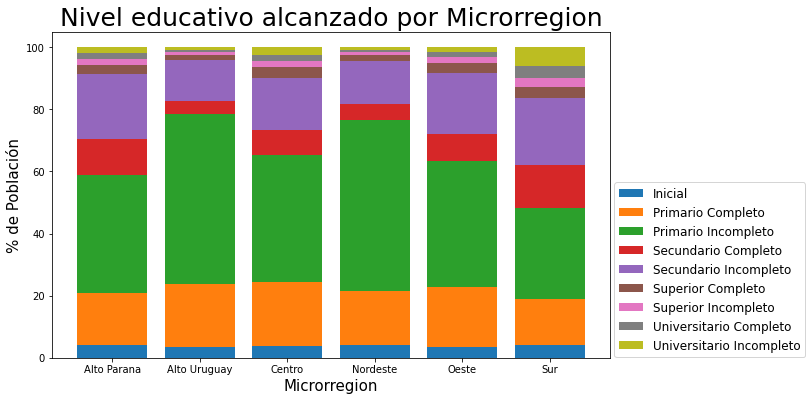

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(niveles,inicial,label="Inicial")
plt.bar(niveles,primario_completo,label='Primario Completo',bottom=np.array(inicial))
plt.bar(niveles,primario_incompleto,label='Primario Incompleto',bottom=np.array(inicial)+np.array(primario_completo))
plt.bar(niveles,secundario_completo,label='Secundario Completo',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto))
plt.bar(niveles,secundario_incompleto,label='Secundario Incompleto',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto)+np.array(secundario_completo))
plt.bar(niveles,sup_completo,label='Superior Completo',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto)+np.array(secundario_completo)+np.array(secundario_incompleto))
plt.bar(niveles,sup_incompleto,label='Superior Incompleto',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto)+np.array(secundario_completo)+np.array(secundario_incompleto)+np.array(sup_completo))
plt.bar(niveles,univ_completo,label='Universitario Completo',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto)+np.array(secundario_completo)+np.array(secundario_incompleto)+np.array(sup_completo)+np.array(sup_incompleto))
plt.bar(niveles,univ_incompleto,label='Universitario Incompleto',bottom=np.array(inicial)+np.array(primario_completo)+np.array(primario_incompleto)+np.array(secundario_completo)+np.array(secundario_incompleto)+np.array(sup_completo)+np.array(sup_incompleto)+np.array(univ_completo))
plt.legend(loc="right",bbox_to_anchor=(1.36,0.27), fontsize=12)
plt.xlabel('Microrregion', fontsize=15)
plt.ylabel('% de Población', fontsize=15)
plt.title('Nivel educativo alcanzado por Microrregion', fontsize=25)

Text(0.5, 1.0, 'Nivel educativo finalizado por Microrregion')

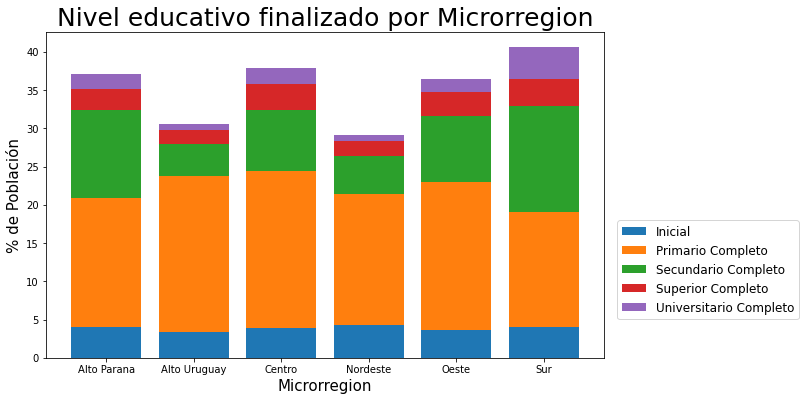

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(niveles,inicial,label="Inicial")
plt.bar(niveles,primario_completo,label='Primario Completo',bottom=np.array(inicial))
plt.bar(niveles,secundario_completo,label='Secundario Completo',bottom=np.array(inicial)+np.array(primario_completo))
plt.bar(niveles,sup_completo,label='Superior Completo',bottom=np.array(inicial)+np.array(primario_completo)+np.array(secundario_completo))
plt.bar(niveles,univ_completo,label='Universitario Completo',bottom=np.array(inicial)+np.array(primario_completo)+np.array(secundario_completo)+np.array(sup_completo))
plt.legend(loc="right",bbox_to_anchor=(1.36,0.27), fontsize=12)
plt.xlabel('Microrregion', fontsize=15)
plt.ylabel('% de Población', fontsize=15)
plt.title('Nivel educativo finalizado por Microrregion', fontsize=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.
  


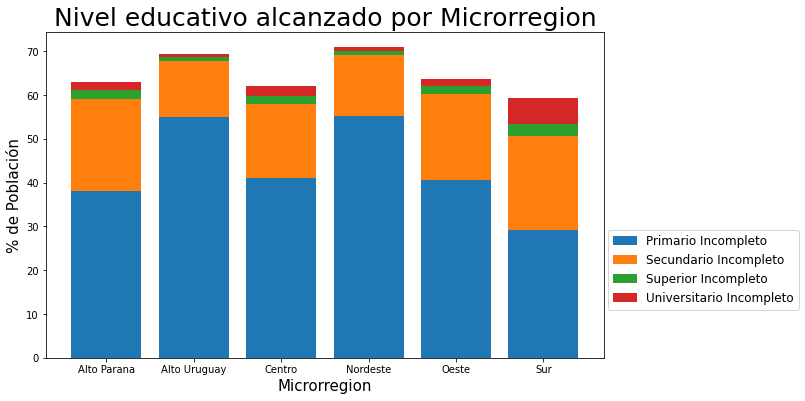

In [ ]:
niv_incompleto = ('Primario Incompleto','Secundario Incompleto','Superior Incompleto','Universitario Incompleto')
colors = sns.color_palette("BuGn", n_colors=len(niv_incompleto))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
grafico1= (plt.figure(figsize=(10,6)),
          plt.bar(niveles,primario_incompleto,label='Primario Incompleto'),
          plt.bar(niveles,secundario_incompleto,label='Secundario Incompleto',bottom=np.array(primario_incompleto)),
          plt.bar(niveles,sup_incompleto,label='Superior Incompleto',bottom=np.array(primario_incompleto)+np.array(secundario_incompleto)),
          plt.bar(niveles,univ_incompleto,label='Universitario Incompleto',bottom=np.array(primario_incompleto)+np.array(secundario_incompleto)+np.array(sup_incompleto)),
          plt.legend(loc="right",bbox_to_anchor=(1.36,0.27), fontsize=12),
          plt.xlabel('Microrregion', fontsize=15),
          plt.ylabel('% de Población', fontsize=15),
          plt.title('Nivel educativo alcanzado por Microrregion', fontsize=25))
plt.colormaps = cmap1
plt.show(plt.colormaps)
